# Image Segmentation with Gauss-Otsu Thresholding and Watershed


---
## Learning Objectives
By the end of this module, learners will:
- Understand what image segmentation is and why it’s crucial in microscopy.
- Apply Gaussian filtering and Otsu thresholding to segment images.
- Use the Watershed algorithm to separate touching objects (e.g., cells).
- Visualize segmented results and assess segmentation quality.

---
## Introduction to Segmentation
Segmentation is the process of dividing an image into meaningful regions (e.g., separating cells from background).

**Microscopy Example:** Segmenting nuclei or cells in a fluorescence image.

We’ll combine:
- **Gaussian filtering:** To smooth noise.
- **Otsu thresholding:** To create binary masks.
- **Watershed:** To separate touching objects.

---
## Setup and Image Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, segmentation, color, measure, feature
from scipy import ndimage as ndi

Use a sample fluorescence image of nuclei:

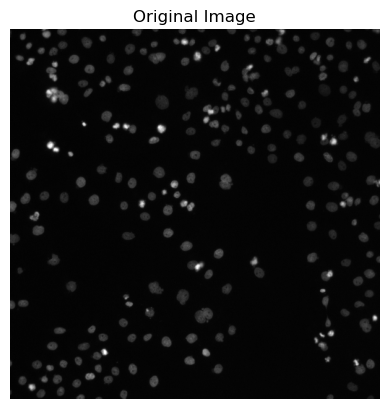

In [2]:
image = io.imread('data/nuclei.tif', as_gray=True)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Gaussian Filtering
Smooth the image to reduce noise before thresholding:

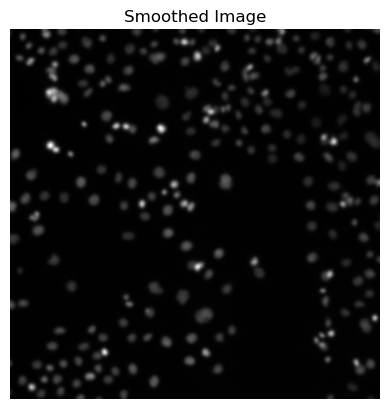

In [3]:
from skimage.filters import gaussian

smoothed = gaussian(image, sigma=2)
plt.imshow(smoothed, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

### Otsu Thresholding
Automatically finds a threshold that separates foreground from background.

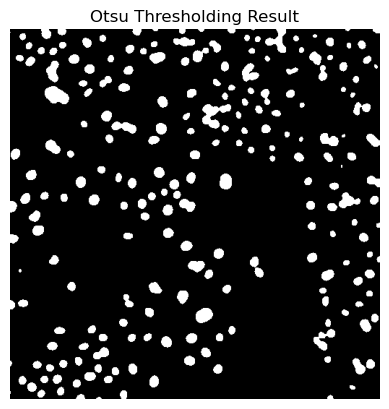

In [4]:
from skimage.filters import threshold_otsu

thresh_val = threshold_otsu(smoothed)
binary = smoothed > thresh_val

plt.imshow(binary, cmap='gray')
plt.title("Otsu Thresholding Result")
plt.axis('off')
plt.show()

### Watershed for Object Separation
We use distance transform to identify object centers and watershed to separate touching objects.

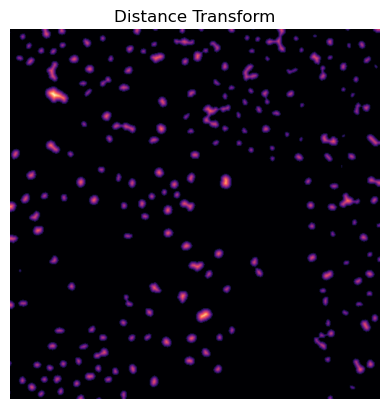

ValueError: operands could not be broadcast together with shapes (536,2) (512,512) 

In [5]:
# Distance transform
distance = ndi.distance_transform_edt(binary)
plt.imshow(distance, cmap='magma')
plt.title('Distance Transform')
plt.axis('off')
plt.show()

# Find peaks in distance image
from skimage.feature import peak_local_max
local_maxi = feature.peak_local_max(distance, labels=binary, footprint=np.ones((3, 3)))

# Markers
markers = ndi.label(local_maxi)[0]

# Apply watershed
labels = segmentation.watershed(-distance, markers, mask=binary)

# Visualize
plt.imshow(color.label2rgb(labels, image=image, bg_label=0))
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()

## Mini Project: Segment Nuclei in Your Image
Instructions:

- Load your own microscopy image of stained nuclei.
- Apply Gaussian + Otsu thresholding.
- Use distance transform and watershed to separate touching nuclei.
- Display the number of objects segmented.

*Bonus: Try different sigma values and visualize the effect.*